In [1]:
from textblob import TextBlob
import win32com.client
from email_reply_parser import EmailReplyParser
import unicodedata
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

In [2]:
# getting the folders of outlook.
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
for i in range(50):
    try:
        box = outlook.GetDefaultFolder(i)
        name = box.Name
        print(i, name)
    except:
        pass

3 Deleted Items
4 Outbox
5 Sent Items
6 Inbox
9 Calendar
10 Contacts
11 Journal
12 Notes
13 Tasks
14 Reminders
15 Reminders
16 Drafts
17 Conflicts
19 Conflicts
20 Sync Issues
21 Local Failures
22 Server Failures
23 Junk E-Mail
25 RSS Feeds
26 Tracked Mail Processing
28 To-Do List
30 Suggested Contacts
31 Quick Step Settings
32 Suggested Contacts


In [3]:
# we are going to look in the sent emails to see my own email sentiments
outlook = win32com.client.Dispatch("Outlook.Application").GetNamespace("MAPI")
sent = outlook.GetDefaultFolder(5) # "5" refers to the index of a folder - in this case,the sent items. 
messages = sent.Items

In [4]:
df=pd.DataFrame(columns=['Date','Polarity'])
for m in messages :
    bdy=unicodedata.normalize("NFKD",EmailReplyParser.parse_reply(m.body).rsplit('\xa0',1)[0])
    try:
        df.loc[len(df)]=[datetime.strftime(m.ReceivedTime,'%Y-%m-%d %H:%M:%S'),TextBlob(bdy).sentiment.polarity]
    except: print('Ignoring fetch Error')
df

,Date,Polarity
0,2020-03-20 19:16:54,0.000000
1,2020-03-20 19:15:49,0.000000
2,2020-03-20 19:06:30,-0.050000
3,2020-03-20 18:51:41,0.000000
4,2020-03-20 18:35:45,0.000000
...,...,...
1976,2020-11-12 14:58:00,0.000000
1977,2020-11-12 15:02:00,-0.033333
1978,2020-11-12 15:17:00,0.000000
1979,2020-11-12 15:17:00,0.000000


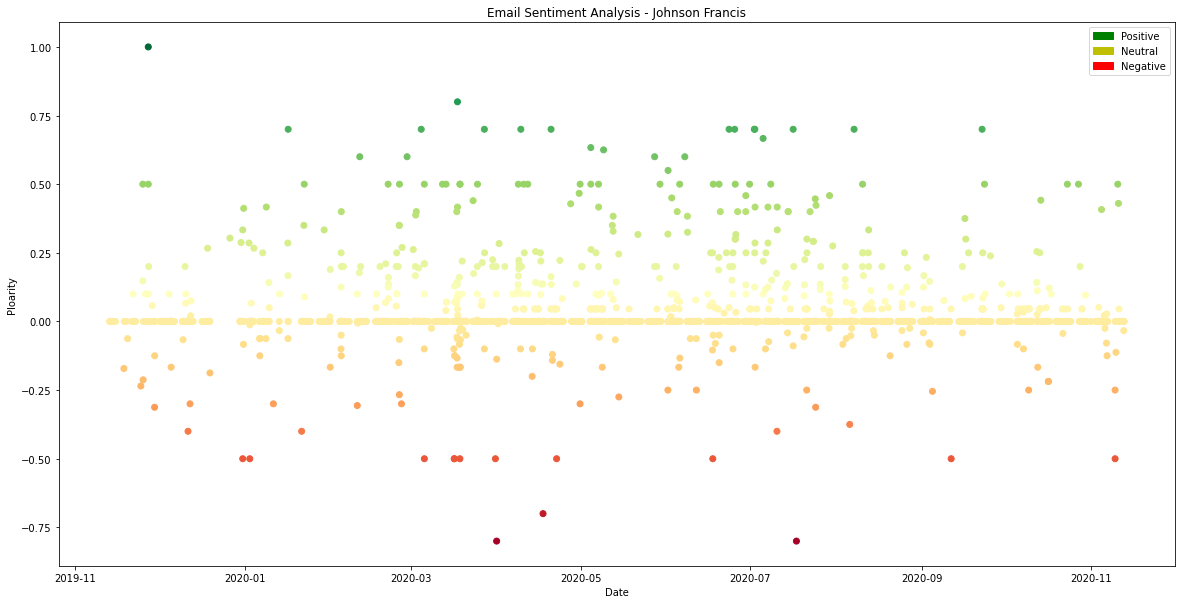

In [5]:
# Converting string date to pandas datetime for easy plotting
df.Date=pd.to_datetime(df.Date)
#plotting
plt.figure(figsize=(20,10))
plt.scatter(df.Date,df.Polarity,c=df.Polarity,cmap='RdYlGn')
pop_a = mpatches.Patch(color='g', label='Positive')
pop_b = mpatches.Patch(color='y', label='Neutral')
pop_c = mpatches.Patch(color='r', label='Negative')
plt.legend(handles=[pop_a,pop_b,pop_c])
plt.title('Email Sentiment Analysis - Johnson Francis')
plt.xlabel('Date')
plt.ylabel('Ploarity')
plt.show()

In [6]:
#setting date as index
dft=df.set_index(df.Date)
#Doing a resample daily with mean anding fill 0 for missing days
dfs=dft[['Polarity']].resample('D').mean().fillna(0)
dfs

,Polarity
Date,
2019-11-13,0.000000
2019-11-14,0.000000
2019-11-15,0.000000
2019-11-16,0.000000
2019-11-17,0.000000
...,...
2020-11-08,0.000000
2020-11-09,-0.107813
2020-11-10,0.195091


<AxesSubplot:title={'center':'Email Sentiment Daily trend - Johnson Francis'}, xlabel='Date', ylabel='Plority'>

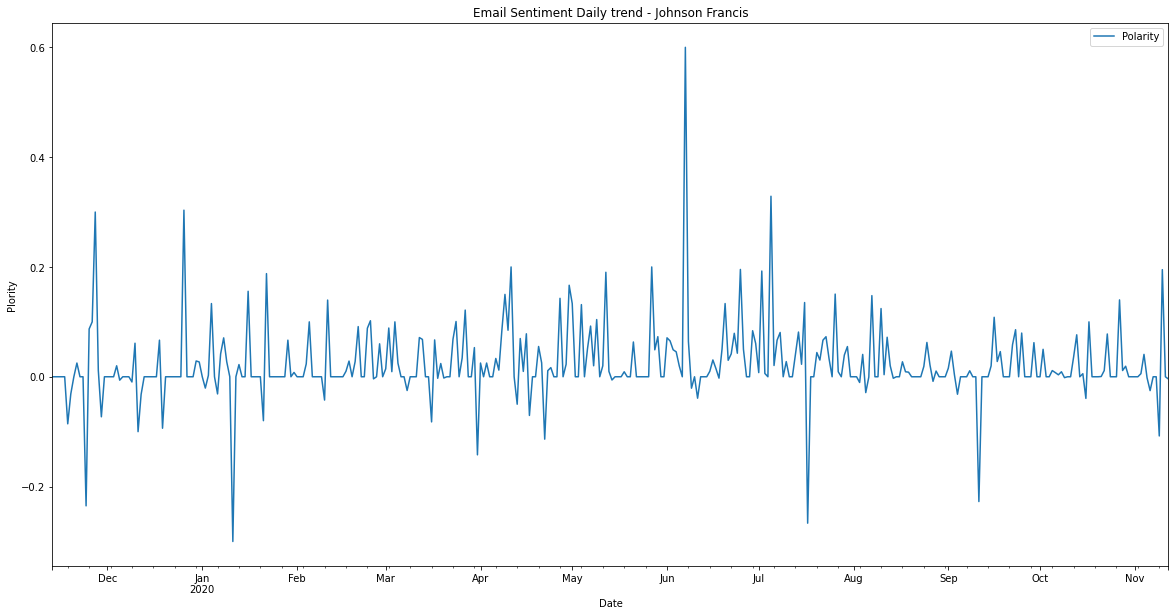

In [7]:
# plotting the daily resampled dataframe
dfs.plot(figsize=(20,10),xlabel='Date',ylabel='Plority',title='Email Sentiment Daily trend - Johnson Francis')

<AxesSubplot:title={'center':'Email Sentiment Monthly trend - Johnson Francis'}, xlabel='Date', ylabel='Plority'>

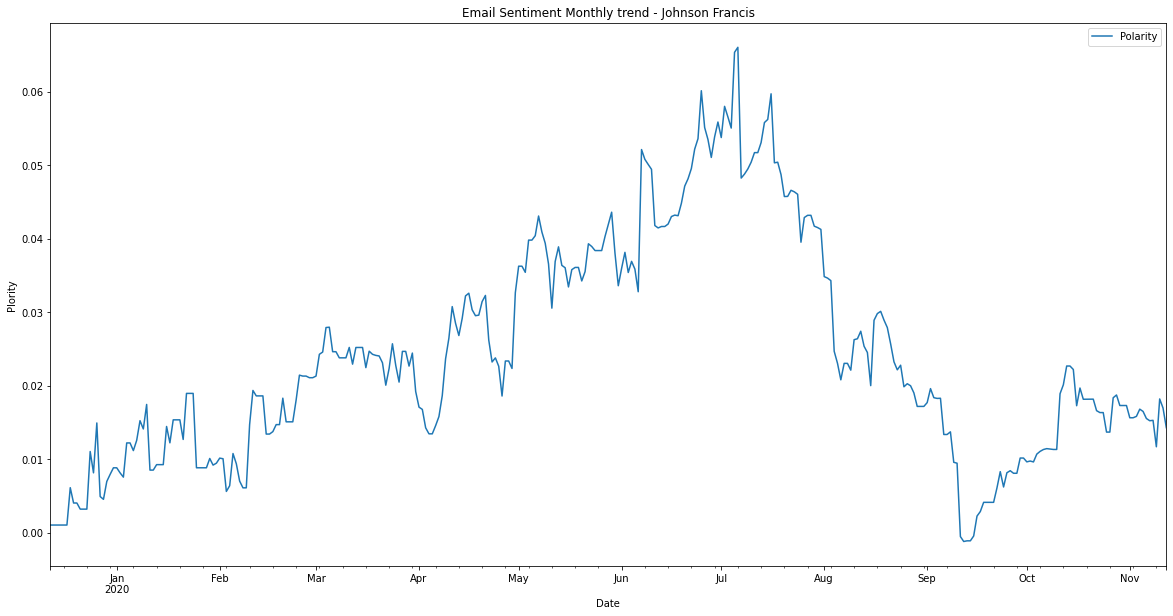

In [8]:
#Lets do a rolling mean monthly and discard the mponth as they will be NaN & plot
dfsm=dfs.rolling(30).mean().iloc[29:]
dfsm.plot(figsize=(20,10),xlabel='Date',ylabel='Plority',title='Email Sentiment Monthly trend - Johnson Francis')